In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
style.use('fivethirtyeight')
sns.set(style='darkgrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  

In [2]:
IMAGE=[]
LABEL=[]
IMG_SIZE=200

def assign_label(img,flower_category):
    return flower_category

def make_train_data(flower_category,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_category)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        IMAGE.append(np.array(img))
        LABEL.append(str(label))

In [3]:
FLOWER_DIR = []
flower_categories = ["Babi", "Calimerio", "Chrysanthemum", "Hydrangeas", "Lisianthus", "Pingpong", "Rosy", "Tana"]

for category in flower_categories:
    flower_dir = f"Flowers/Flowers/{category}"
    FLOWER_DIR.append(flower_dir)
    make_train_data(category, flower_dir)
print(len(IMAGE))


100%|██████████████████████████████████████████████████████████████████████████████| 623/623 [00:00<00:00, 1247.50it/s]

4621


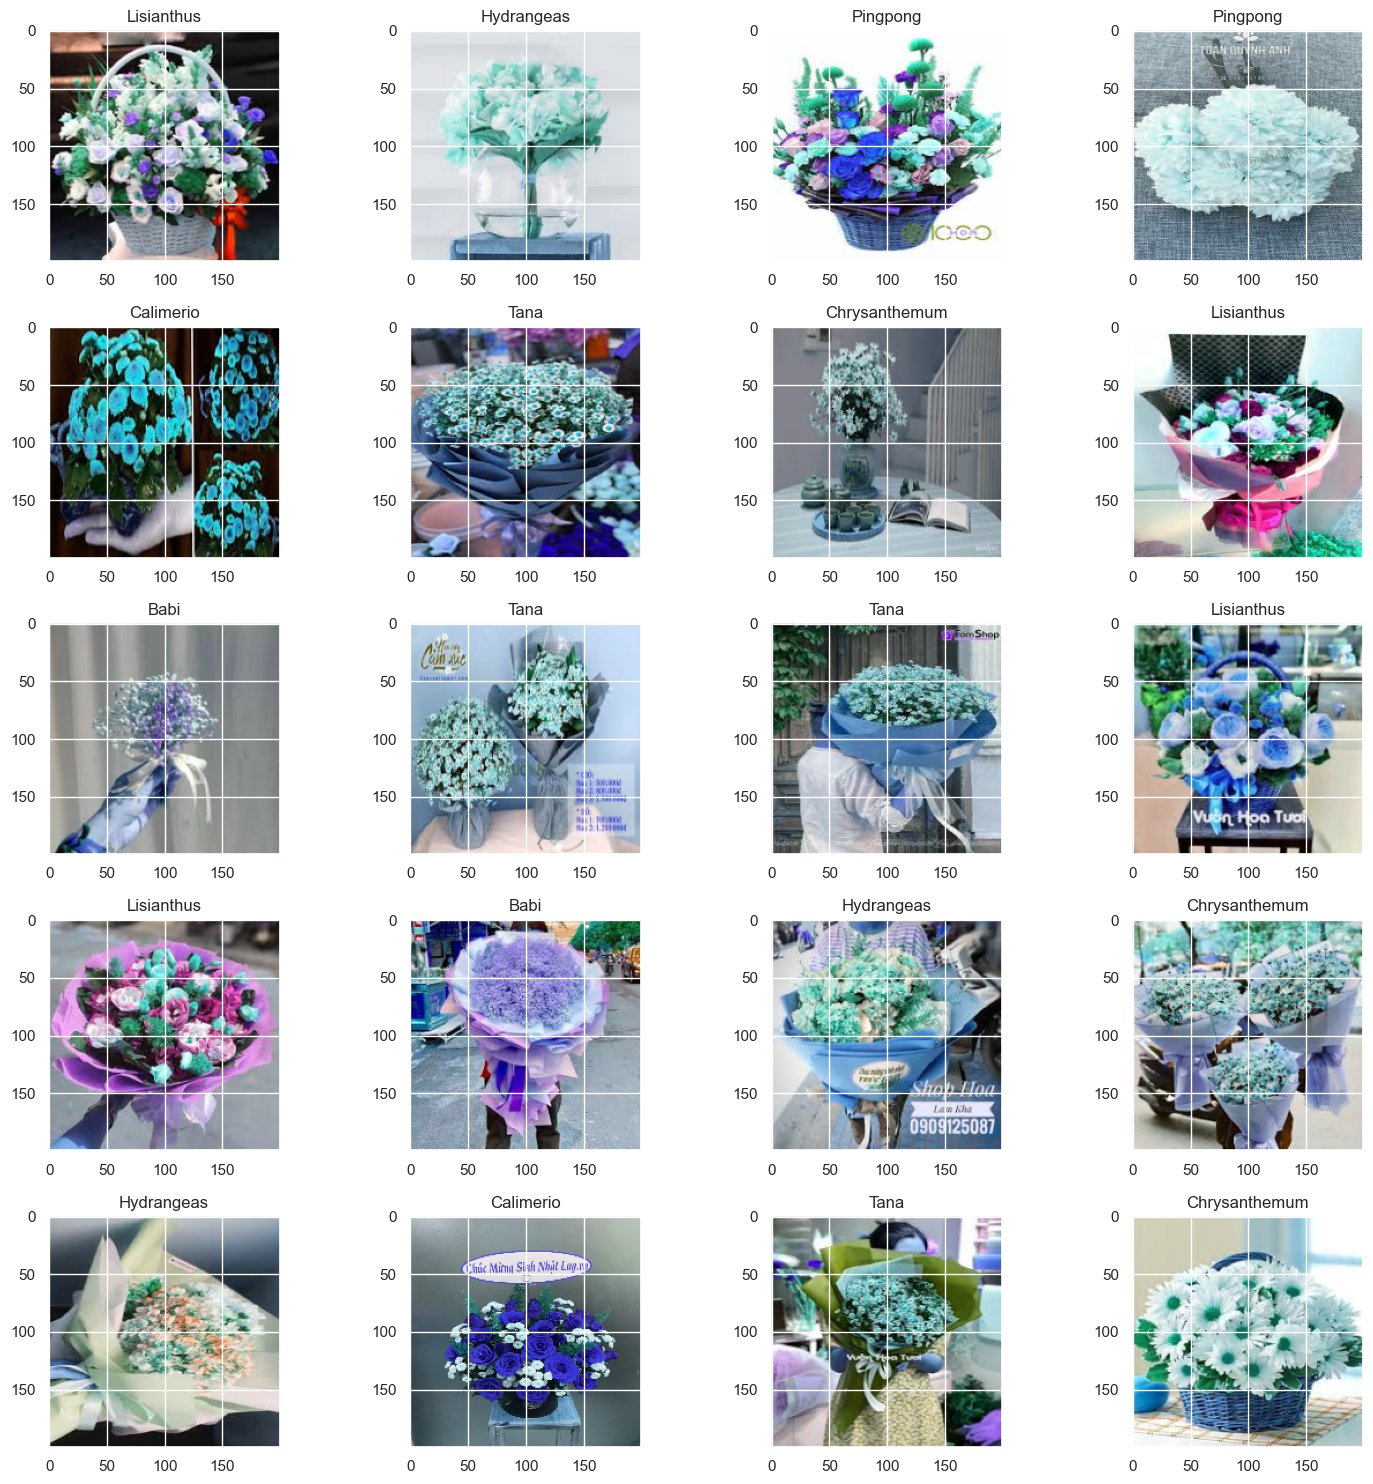

In [4]:
fig,ax=plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (4):
        l=rn.randint(0,len(LABEL))
        ax[i,j].imshow(IMAGE[l])
        ax[i,j].set_title(LABEL[l])
        
plt.tight_layout()

In [5]:
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(LABEL)
Y=to_categorical(Y,8)
X=np.array(IMAGE)
X=X/255

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Confirm the shapes of the data splits
print("Train set shapes:", x_train.shape, y_train.shape)
print("Test set shapes:", x_test.shape, y_test.shape)

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

Train set shapes: (3696, 200, 200, 3) (3696, 8)
Test set shapes: (925, 200, 200, 3) (925, 8)


In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(8, activation = "softmax"))

In [8]:
batch_size=128
epochs=50

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [9]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 96)       0

In [10]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,)

Epoch 1/50
28/28 [==============================] - 50s 1s/step - loss: 1.9979 - accuracy: 0.1984 - val_loss: 1.9692 - val_accuracy: 0.2346
Epoch 2/50
28/28 [==============================] - 25s 892ms/step - loss: 1.9181 - accuracy: 0.2789 - val_loss: 1.7991 - val_accuracy: 0.3178
Epoch 3/50
28/28 [==============================] - 25s 890ms/step - loss: 1.7750 - accuracy: 0.3391 - val_loss: 1.6531 - val_accuracy: 0.4086
Epoch 4/50
28/28 [==============================] - 25s 892ms/step - loss: 1.6609 - accuracy: 0.4100 - val_loss: 1.5161 - val_accuracy: 0.4595
Epoch 5/50
28/28 [==============================] - 27s 944ms/step - loss: 1.5222 - accuracy: 0.4470 - val_loss: 1.5519 - val_accuracy: 0.4508
Epoch 6/50
28/28 [==============================] - 25s 898ms/step - loss: 1.5393 - accuracy: 0.4409 - val_loss: 1.3566 - val_accuracy: 0.4951
Epoch 7/50
28/28 [==============================] - 30s 1s/step - loss: 1.4661 - accuracy: 0.4647 - val_loss: 1.4482 - val_accuracy: 0.4714
Epoch

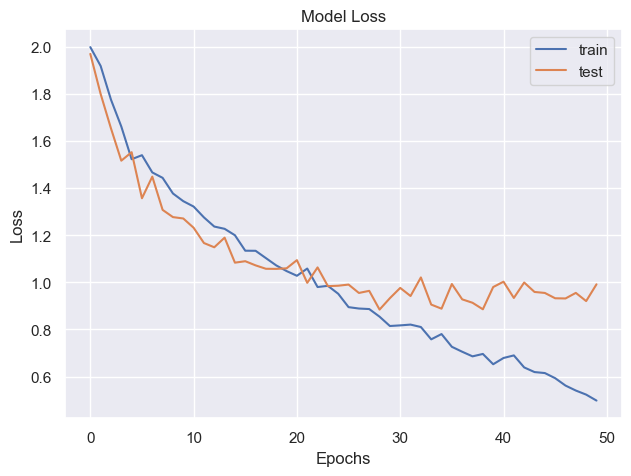

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

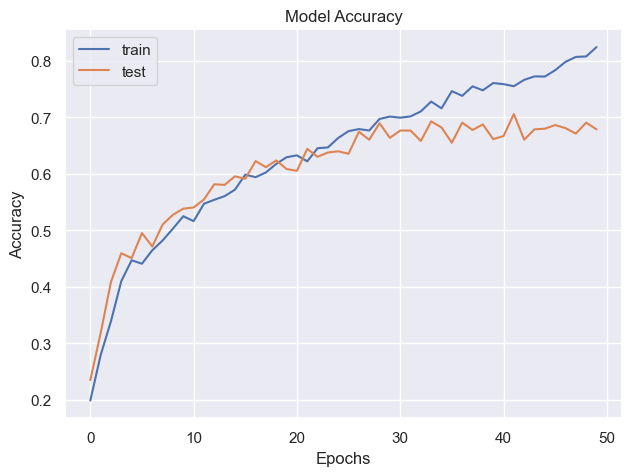

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()